In [2]:
import vae
from vae import *
%reload_ext autoreload
%autoreload 2

In [3]:
#Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
#Load datasets and data loaders for training and testing
transformations = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.FashionMNIST(
    './data',
    train=True,
    download=True,
    transform=transformations)

test_dataset = datasets.FashionMNIST(
    './data',
    train=False,
    download=True,
    transform=transformations
)

In [5]:
from visualizations import *

train_set_loader = DataLoader(train_dataset, batch_size=512)
test_set_loader = DataLoader(test_dataset, batch_size=1)

TSNE Visualization of Raw Fashion MNIST Training Data: 


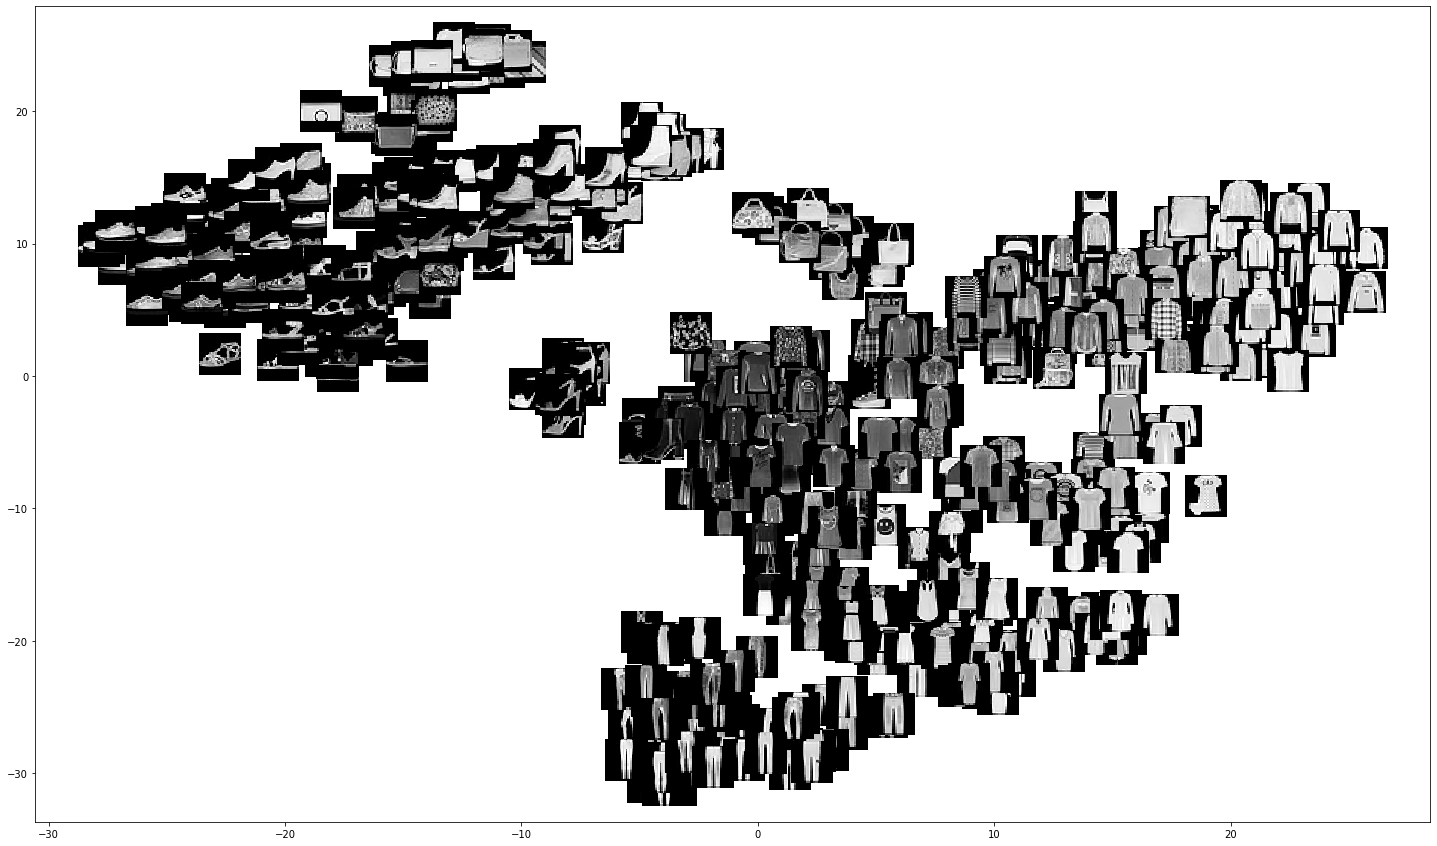

In [6]:
genTSNEplots(train_set_loader, device)

In [ ]:
#train VAE 
#NOTE: skip if you just want to use the trained one - takes about 45 min on GPU, will be at least 5-10x longer on CPU
#NOTE: KL multiplier set to 10 produced optimal results
train_VAE(train_dataset, device) 

In [7]:
#load weights of trained VAE
model = VAE(device)
model.push_to_device()
model.load_state_dict(torch.load('vae.torch', map_location=torch.device('cpu')))
model.eval()

VAE(
  (encoder): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU()
    (6): Conv2d(256, 512, kernel_size=(2, 2), stride=(2, 2))
    (7): Flatten()
  )
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=512, bias=True)
  (decoder): Sequential(
    (0): UnFlatten()
    (1): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (2): ReLU()
    (3): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2))
    (4): ReLU()
    (5): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2))
    (6): ReLU()
    (7): ConvTranspose2d(64, 1, kernel_size=(5, 5), stride=(2, 2))
    (8): Sigmoid()
  )
)

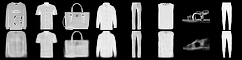

In [8]:
test_VAE(model, test_dataset, device)

TSNE Visualization of Fashion MNIST Training Data Latent Space: 


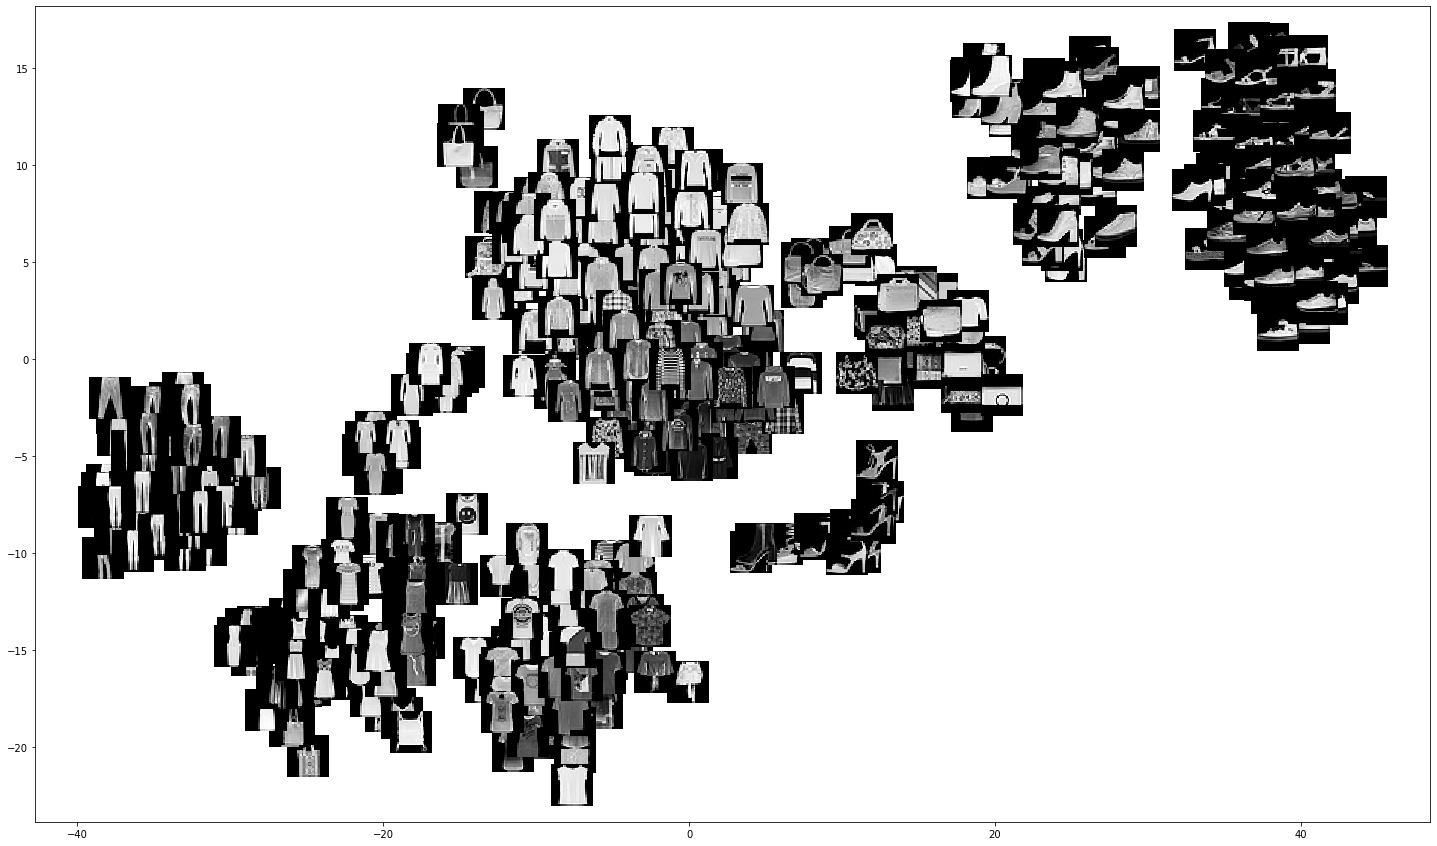

In [194]:
genTSNEplots(train_set_loader, device, model)

Distribution of First 2 Latent Dims (out of 128) for Category 0 :


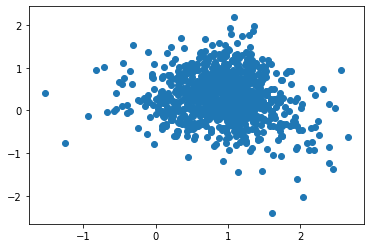

In [200]:
plotLatentByCat(0, test_set_loader, model, device) #plotLatentByCat(k, data_loader, model, device)

In [ ]:
avg_means, avg_logvars = calcLatentStatsByCat(train_set_loader, model, device)

generated image(s) from category 8 :


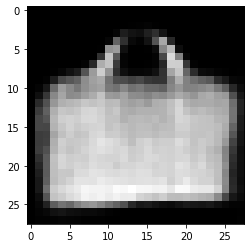

In [181]:
genNewImByCat(1, 8, 0, [avg_means, avg_logvars], train_set_loader, model, device) 

generated image(s) from category 8 :


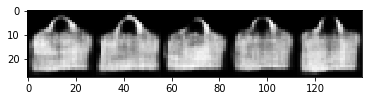

In [184]:
genNewImByCat(5, 8, 20, [avg_means, avg_logvars], train_set_loader, model, device) 

Linear Interpolation vs. Latent Space Interpolation


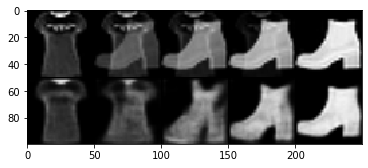

In [220]:
genRandomInterpolation(train_set_loader, model, device) 